In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1 获取数据

In [2]:
file_data=pd.read_csv('./data/链家北京租房数据.csv')
file_data.shape

(8223, 5)

In [3]:
file_data.info

<bound method DataFrame.info of       区域        小区名称     户型     面积(㎡)  价格(元/月)
0     东城     万国城MOMA   1室0厅   59.11平米    10000
1     东城    北官厅胡同2号院   3室0厅   56.92平米     6000
2     东城       和平里三区   1室1厅   40.57平米     6900
3     东城        菊儿胡同   2室1厅   57.09平米     8000
4     东城  交道口北二条35号院   1室1厅   42.67平米     5500
...   ..         ...    ...       ...      ...
8218  顺义        怡馨家园   3室1厅  114.03平米     5500
8219  顺义      旭辉26街区  4房间2卫      59平米     5000
8220  顺义     前进花园玉兰苑   3室1厅   92.41平米     5800
8221  顺义        双裕小区   2室1厅   71.81平米     4200
8222  顺义       樱花园二区   1室1厅   35.43平米     2700

[8223 rows x 5 columns]>

In [4]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


# 2 数据基本处理

## 2.1 重复值和空值处理

In [5]:
# 重复数据检测
#file_data.duplicated()
file_data=file_data.drop_duplicates()

In [6]:
file_data.shape

(5773, 5)

In [7]:
# 空值处理
file_data=file_data.dropna()

In [8]:
file_data.shape

(5773, 5)

## 2.2 数据类型转换

In [9]:
# 面积数据类型转换
data_new=np.array([])
data_area=file_data['面积(㎡)'].values
for i in data_area:
    data_new=np.append(data_new, np.array(i[:-2]))
data_new

array(['59.11', '56.92', '40.57', ..., '92.41', '71.81', '35.43'],
      dtype='<U32')

In [10]:
data_new=data_new.astype(np.float64)
file_data.loc[:,'面积(㎡)']=data_new

In [11]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


In [12]:
# 户型表示方式替换
house_data=file_data['户型']
temp_list=[]

for i in house_data:
    new_info = i.replace('房间','室')
    temp_list.append(new_info)
file_data.loc[:,'户型']=temp_list
file_data.head() 

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


# 3 图表分析

## 3.1 房源数量和位置分布分析

In [13]:
new_df=pd.DataFrame({'区域':file_data['区域'].unique(),'数量':[0]*13})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [14]:
area_count=file_data.groupby(by='区域').count()
new_df['数量']=area_count.values
new_df.sort_values(by='数量',ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


## 3.2 户型数量分析

In [15]:
house_data = file_data['户型']
house_data

0       1室0厅
1       3室0厅
2       1室1厅
3       2室1厅
4       1室1厅
        ... 
8218    3室1厅
8219    4室2卫
8220    3室1厅
8221    2室1厅
8222    1室1厅
Name: 户型, Length: 5773, dtype: object

In [16]:
def all_house(arr):
    key = np.unique(arr)
    result={}
    
    for k in key:
        mask = (arr == k)
        arr_new=arr[mask]
        v=arr_new.size
        result[k]=v
        
    return result

In [17]:
house_info=all_house(house_data)

In [18]:
# 去掉统计数量较少的值
house_data=dict((key,value) for key,value in house_info.items() if value >50)

In [19]:
show_house = pd.DataFrame({'户型':[x for x in house_data.keys()], '数量':[x for x in house_data.values()]})

In [20]:
show_house

,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21381 (\N{CJK UNIFIED IDEOGRAPH-5385}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21355 (\N{CJK UNIFIED IDEOGRAPH-536B}) missing from current fon

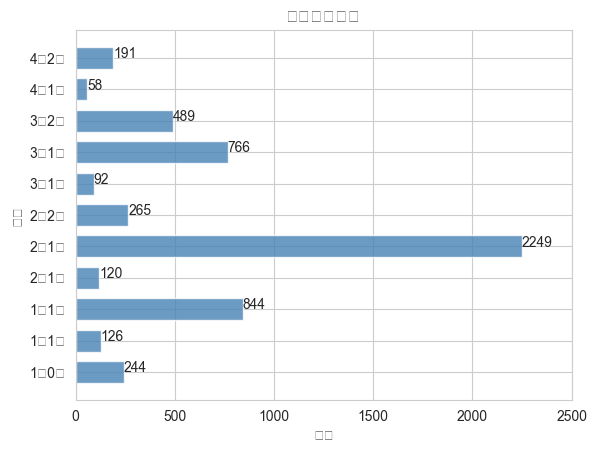

In [21]:
# 房屋类型展示图
house_type = show_house['户型']
house_num = show_house['数量']

plt.barh(range(11),house_num, height=0.7, color = 'steelblue', alpha=0.8)
plt.yticks(range(11),house_type)
plt.xlim(0,2500)

plt.title('租房数量统计')
plt.xlabel('数量')
plt.ylabel('类型')

# 给每个条上加数字
for x, y in enumerate(house_num):
    plt.text(y,x,'%s'%y)

plt.show()

## 3.3 平均租金分析

In [22]:
df_all=pd.DataFrame({'区域':file_data['区域'].unique(),
              '房租总金额':[0]*13,
              '总面积':[0]*13})

In [23]:
sum_price=file_data['价格(元/月)'].groupby(file_data['区域']).sum()

In [24]:
sum_area=file_data['面积(㎡)'].groupby(file_data['区域']).sum()

In [25]:
df_all['房租总金额']=sum_price.values
df_all['总面积']=sum_area.values

In [26]:
df_all['每平米租金(元)'] = df_all['房租总金额'] / df_all ['总面积']

In [27]:
df_merge=pd.merge(new_df, df_all)

In [28]:
df_merge

,区域,数量,房租总金额,总面积,每平米租金(元)
0,东城,282,3945550,27353.99,144.240383
1,丰台,577,4404893,50922.79,86.501407
2,亦庄开发区,147,1318400,15995.53,82.423027
3,大兴,362,2286950,35884.15,63.73148
4,房山,180,726750,15275.41,47.576464
5,昌平,347,2521515,35972.92,70.09481
6,朝阳,1597,20281396,166921.72,121.502438
7,海淀,605,7279350,57210.39,127.238252
8,石景山,175,1156500,13956.67,82.863606
9,西城,442,5636975,37141.64,151.769685


D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20016 (\N{CJK UNIFIED IDEOGRAPH-4E30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20134 (\N{CJK UNIFIED IDEOGRAPH-4EA6}) missing from current fon

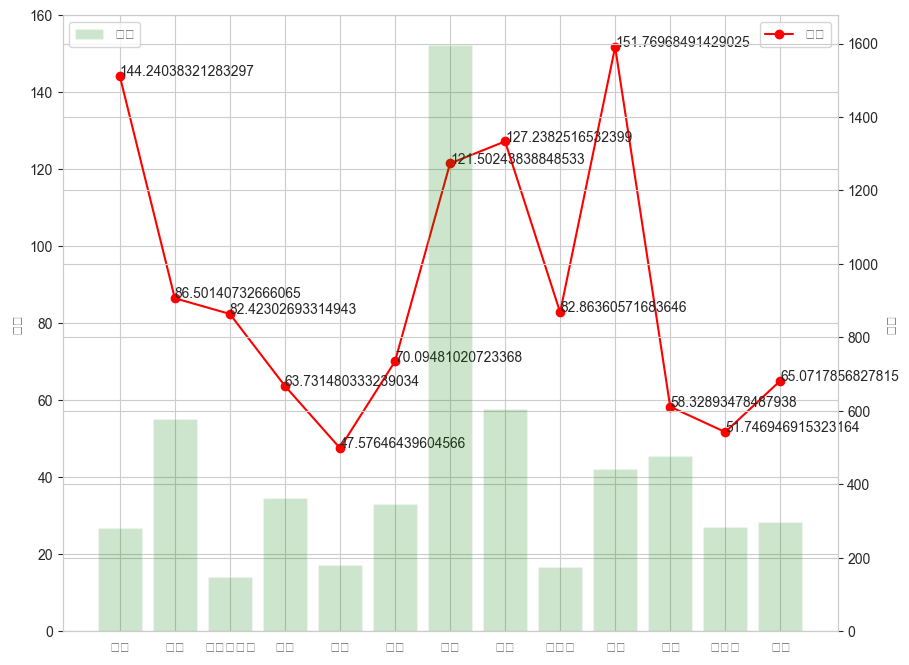

In [29]:
num=df_merge['数量']
price=df_merge['每平米租金(元)']
lx=df_merge['区域']
l = [i for i in range(13)]

fig=plt.figure(figsize=(10,8),dpi=100)

# 显示折线图
ax1=fig.add_subplot(111)
ax1.plot(l,price,'or-',label='价格')

for i, (_x,_y) in enumerate(zip(l,price)):
    plt.text(_x,_y,price[i])
ax1.set_ylim([0,160])
ax1.set_ylabel('价格')
plt.legend(loc='upper right')

# 显示条形图
ax2=ax1.twinx()
plt.bar(l,num,label='数量',alpha=0.2,color='green')
ax2.set_ylabel('数量')
plt.legend(loc='upper left')

plt.xticks(l, lx)

plt.show()

## 3.4 面积划分 

In [43]:
area_divide=[1,30,50,70,90,120,140,160,1200]
area_cut=pd.cut(list(file_data['面积(㎡)']),area_divide)

In [44]:
area_cut_num=area_cut.describe()
area_cut_num

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


In [45]:
area_per=(area_cut_num['freqs'].values)*100
area_per

array([ 0.71020267, 12.29863156, 27.1262775 , 18.95028581, 18.74242162,
        6.5996882 ,  4.74623246, 10.82626018])

D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\miniconda\envs\PythonProject\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current fon

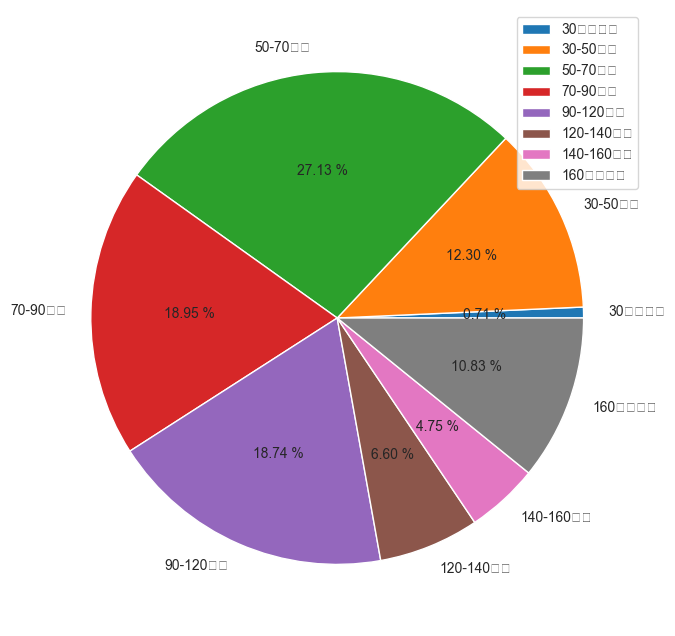

In [49]:
plt.figure(figsize=(8,8),dpi=100)

labels = ['30平米以下', '30-50平米', '50-70平米', '70-90平米', '90-120平米','120-140平米','140-160平米','160平米以上']

plt.axes()
plt.pie(x=area_per,labels=labels,autopct='%.2f %%')
plt.legend()

plt.show()